# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12
%pip install --upgrade --force-reinstall matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.8-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached packaging-26.0-py3-none-any.whl (74 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached fonttools-4.61.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (4.9 MB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
  Using cached pillow-12.1.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (7.0 MB)
  Using ca

In [2]:
!pip install --target=/workspace ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.8 MB)
  Using cached certifi-2026.1.4-py3-none-any.whl (152 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.11.2 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.6 which is incompatible.


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, I extracted data using two different data gathering methods. I used two different types of data-gathering methods, the "Downloading files" method from Kaggle, and the "Download programatically" method also from Kaggle.

### **1.1.** Problem Statement
The goal of this project is to explore the relationship between soccer forwards’ on-field performance, age, and their market value in the Premier League. Specifically, the analysis will examine whether metrics such as goals and assists along with player age, are associated with higher market valuations, considering that younger players are often valued more highly than older players. By combining performance, age, and financial data, this project aims to uncover patterns linking athletic output and age to financial worth.

#### **Dataset 1**

Type: CSV File.

Reason for choosing: This dataset was chosen because it provides key performance metrics for soccer forwards (e.g., goals, assists, minutes played) that are directly relevant to evaluating player performance.

Method: The data was gathered using the "Downloading files" method from Kaggle.

The dataset can be found here: https://www.kaggle.com/datasets/mohamedsewid/soccer-forwards-performance-and-market-value-2025/data

Dataset variables:

* name:	Player full name
* position:	Attacking position (CF, LW, RW, SS)
* age:	Player age in years
* nation:	Player nationality
* club:	N/A
* league:	N/A
* matches:	Matches played (2024-25)
* goals:	Goals scored
* assists:	Assists provided
* points: (goals+assists)	Combined performance metric
* value:	Market value (Euros)
* player_link:	Transfermarkt profile URL

In [3]:
import pandas as pd
import numpy as np

tp = pd.read_csv("transfermarket_players.csv")
tp.head(10)

,name,player_link,position,age,nation,club,league,matches,goals,assists,points(goals+assists),value
0,Lukas Holik,https://www.transfermarkt.com/lukas-holik/prof...,Second Striker,31,Czech Republic,NaN,NaN,33,14,15,29,-
1,Matheus Cunha,https://www.transfermarkt.com/matheus-cunha/pr...,Second Striker,25,Brazil,NaN,NaN,36,17,6,23,€60.00m
2,Rafa Silva,https://www.transfermarkt.com/rafa-silva/profi...,Second Striker,31,Portugal,NaN,NaN,39,15,8,23,€9.00m
3,Matej Hoic,https://www.transfermarkt.com/matej-hoic/profi...,Second Striker,23,Croatia,NaN,NaN,32,19,3,22,-
4,Mohamed Alì Zoma,https://www.transfermarkt.com/mohamed-ali-zoma...,Second Striker,20,"Italy, Cote d'Ivoire",NaN,NaN,35,13,8,21,€500k
5,Nick Woltemade,https://www.transfermarkt.com/nick-woltemade/p...,Second Striker,22,Germany,NaN,NaN,33,17,3,20,€30.00m
6,Ademola Lookman,https://www.transfermarkt.com/ademola-lookman/...,Second Striker,26,"Nigeria, England",NaN,NaN,32,15,5,20,€60.00m
7,Dries Mertens,https://www.transfermarkt.com/dries-mertens/pr...,Second Striker,37,Belgium,NaN,NaN,40,5,15,20,-
8,Jamie Donley,https://www.transfermarkt.com/jamie-donley/pro...,Second Striker,19,"Northern Ireland, England",NaN,NaN,45,8,11,19,€1.50m
9,Antoine Griezmann,https://www.transfermarkt.com/antoine-griezman...,Second Striker,33,France,NaN,NaN,43,10,7,17,€18.00m


#### Dataset 2

Type: CSV File.

Reason of choosing: This dataset was selected because it focuses on player market values in the Premier League, enabling financial comparison with performance data. 

Method: The data was gathered using the "Download programatically" method from Kaggle.

The dataset can be found here: https://www.kaggle.com/datasets/piyushsharma37/premier-league-market-value-dataset-2025/data

Dataset variables:

*  Player Name: Players names
*  Age: Age of the player
*  Club: The club where the player plays
*  Nationality: The nationality of the player
*  Position: The playing postion of the player
*  Market Value: Current market value (in € millions)

In [4]:
!python -m pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("piyushsharma37/premier-league-market-value-dataset-2025")

pl = pd.read_csv(f'{path}/premier_league_players.csv')
pl.head(10)

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Player Name,Age,Market Value,Club,Position,Nationality
0,Erling Haaland,24,€180.00m,Manchester City,Centre-Forward,Norway
1,Bukayo Saka,23,€150.00m,Arsenal FC,Right Winger,England
2,Florian Wirtz,22,€140.00m,Liverpool FC,Attacking Midfield,Germany
3,Cole Palmer,23,€120.00m,Chelsea FC,Attacking Midfield,England
4,Alexander Isak,25,€120.00m,Newcastle United,Centre-Forward,Sweden
5,Declan Rice,26,€110.00m,Arsenal FC,Central Midfield,England
6,Rodri,29,€100.00m,Manchester City,Defensive Midfield,Spain
7,Alexis Mac Allister,26,€90.00m,Liverpool FC,Central Midfield,Argentina
8,Phil Foden,25,€85.00m,Manchester City,Right Winger,England
9,Moisés Caicedo,23,€80.00m,Chelsea FC,Defensive Midfield,Ecuador


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [6]:
tp.head()

,name,player_link,position,age,nation,club,league,matches,goals,assists,points(goals+assists),value
0,Lukas Holik,https://www.transfermarkt.com/lukas-holik/prof...,Second Striker,31,Czech Republic,NaN,NaN,33,14,15,29,-
1,Matheus Cunha,https://www.transfermarkt.com/matheus-cunha/pr...,Second Striker,25,Brazil,NaN,NaN,36,17,6,23,€60.00m
2,Rafa Silva,https://www.transfermarkt.com/rafa-silva/profi...,Second Striker,31,Portugal,NaN,NaN,39,15,8,23,€9.00m
3,Matej Hoic,https://www.transfermarkt.com/matej-hoic/profi...,Second Striker,23,Croatia,NaN,NaN,32,19,3,22,-
4,Mohamed Alì Zoma,https://www.transfermarkt.com/mohamed-ali-zoma...,Second Striker,20,"Italy, Cote d'Ivoire",NaN,NaN,35,13,8,21,€500k


In [7]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2010 non-null   object 
 1   player_link            2010 non-null   object 
 2   position               2010 non-null   object 
 3   age                    2010 non-null   int64  
 4   nation                 2010 non-null   object 
 5   club                   0 non-null      float64
 6   league                 0 non-null      float64
 7   matches                2010 non-null   int64  
 8   goals                  2010 non-null   int64  
 9   assists                2010 non-null   int64  
 10  points(goals+assists)  2010 non-null   int64  
 11  value                  2010 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 188.6+ KB


Issue and justification: The transfermarket dataset was visually inspected using .head() and .info() to identify columns with missing entries, particularly in value-related variables and it was obvious that it had "-" for missing value, and contained 2 empty columns, the "club" and "league" columns.

### Quality Issue 2:

In [8]:
pl[pl['Player Name'] == 'Andrew Robertson']

,Player Name,Age,Market Value,Club,Position,Nationality
249,Andrew Robertson,31,€14.00m,Liverpool FC,Left-Back,Scotland
254,Andrew Robertson,31,€13.00m,Liverpool FC,Left-Back,Scotland


In [9]:
pl.groupby(['Player Name', 'Club'])['Market Value'].nunique().sort_values(ascending=False)

Player Name         Club                   
Andrew Robertson    Liverpool FC               2
Leandro Trossard    Arsenal FC                 2
Daichi Kamada       Crystal Palace             2
Maxence Lacroix     Crystal Palace             2
Hee-chan Hwang      Wolverhampton Wanderers    2
                                              ..
Gabriel Martinelli  Arsenal FC                 1
Gabriel Magalhães   Arsenal FC                 1
Gabriel Jesus       Arsenal FC                 1
Fábio Vieira        Arsenal FC                 1
Hannes Delcroix     Burnley FC                 1
Name: Market Value, Length: 477, dtype: int64

Issue and justification: Some players appear multiple times for the same club but with different Market Value values (e.g., Andrew Robertson at Liverpool FC), the visual check reveals repeated players, and the grouping with nunique() confirms that these duplicates contain conflicting financial values, indicating unreliable or inconsistent records.

### Tidiness Issue 1:

In [10]:
tp.columns

Index(['name', 'player_link', 'position', 'age', 'nation', 'club', 'league',
       'matches', 'goals', 'assists', 'points(goals+assists)', 'value'],
      dtype='object')

In [11]:
pl.columns

Index(['Player Name', 'Age', 'Market Value', 'Club', 'Position',
       'Nationality'],
      dtype='object')

In [12]:
set(tp.columns) ^ set(pl.columns)

{'Age',
 'Club',
 'Market Value',
 'Nationality',
 'Player Name',
 'Position',
 'age',
 'assists',
 'club',
 'goals',
 'league',
 'matches',
 'name',
 'nation',
 'player_link',
 'points(goals+assists)',
 'position',
 'value'}

Issue and justification: Player identifiers are labeled differently (e.g., Player vs Player Name, Market value vs value), complicating dataset merging.

### Tidiness Issue 2: 

In [13]:
tp['value'].head()

0          -
1    €60.00m
2     €9.00m
3          -
4      €500k
Name: value, dtype: object

In [14]:
tp['value'].dtype

dtype('O')

In [15]:
pl['Market Value'].dtype

dtype('O')

Issue and justification: Market values include symbols and units (€, M, K, and -), preventing direct numerical comparison and analysis, the visual output shows currency formatting and unit suffixes, while the data type check confirms the columns are treated as text. Together, they demonstrate that these values must be parsed before quantitative analysis

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [16]:
transfer_raw = tp
premier_raw = pl

### **Quality Issue 1: Missing values and empty columns in transfermarket dataset**

In [17]:
tp['value'] = tp['value'].replace("-", np.nan)
tp.drop(columns=['club', 'league'], inplace=True)

In [18]:
tp.isna().sum()

name                       0
player_link                0
position                   0
age                        0
nation                     0
matches                    0
goals                      0
assists                    0
points(goals+assists)      0
value                    250
dtype: int64

Justification: The dash symbol is not a valid missing data format for numerical analysis, so converting it to NaN ensures consistency.
Columns with 100% missing data provide no analytical value and were removed to improve dataset quality.

### **Quality Issue 2: Duplicate players with inconsistent market values in premier league dataset**

In [19]:
pl = pl.drop_duplicates(subset=['Player Name','Club'])


In [20]:
pl.duplicated(subset=['Player Name','Club']).sum()


np.int64(0)

Justification: Since duplicated players had conflicting market values nothing was provided to determine which was correct, keeping a single record per player-club pair eliminates inconsistency.

### **Tidiness Issue 1: Inconsistent column naming across datasets**

In [21]:
tp.rename(columns={
    'name': 'Player Name',
    'value': 'Market Value',
    'age': 'Age',
    'points(goals+assists)': 'Points',
    'position': 'Position'
}, inplace=True)

In [22]:
tp.columns

Index(['Player Name', 'player_link', 'Position', 'Age', 'nation', 'matches',
       'goals', 'assists', 'Points', 'Market Value'],
      dtype='object')

In [23]:
pl.columns

Index(['Player Name', 'Age', 'Market Value', 'Club', 'Position',
       'Nationality'],
      dtype='object')

Justification: Consistent variable names are necessary for merging datasets and maintaining tidy data principles, 3 columns were renamed in the Transfermarket dataset.

### **Tidiness Issue 2: Market values stored as non-numeric currency strings**

In [24]:
# A helper function to clean the market value of the players

def parse_value(val):
    if pd.isna(val):
        return np.nan
    
    val = str(val).replace("€","").strip()
    
    if val.lower().endswith("m"):
        return float(val[:-1]) * 1_000_000
    
    if val.lower().endswith("k"):
        return float(val[:-1]) * 1_000
    
    try:
        return float(val)
    except:
        return np.nan


In [25]:
tp['Market_Value_EUR'] = tp['Market Value'].apply(parse_value).astype('Int64')
pl['Market_Value_EUR'] = pl['Market Value'].apply(parse_value).astype('Int64')

/tmp/ipykernel_200/3781136532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl['Market_Value_EUR'] = pl['Market Value'].apply(parse_value).astype('Int64')


In [26]:
tp.head()

,Player Name,player_link,Position,Age,nation,matches,goals,assists,Points,Market Value,Market_Value_EUR
0,Lukas Holik,https://www.transfermarkt.com/lukas-holik/prof...,Second Striker,31,Czech Republic,33,14,15,29,NaN,<NA>
1,Matheus Cunha,https://www.transfermarkt.com/matheus-cunha/pr...,Second Striker,25,Brazil,36,17,6,23,€60.00m,60000000
2,Rafa Silva,https://www.transfermarkt.com/rafa-silva/profi...,Second Striker,31,Portugal,39,15,8,23,€9.00m,9000000
3,Matej Hoic,https://www.transfermarkt.com/matej-hoic/profi...,Second Striker,23,Croatia,32,19,3,22,NaN,<NA>
4,Mohamed Alì Zoma,https://www.transfermarkt.com/mohamed-ali-zoma...,Second Striker,20,"Italy, Cote d'Ivoire",35,13,8,21,€500k,500000


In [27]:
pl.head()

,Player Name,Age,Market Value,Club,Position,Nationality,Market_Value_EUR
0,Erling Haaland,24,€180.00m,Manchester City,Centre-Forward,Norway,180000000
1,Bukayo Saka,23,€150.00m,Arsenal FC,Right Winger,England,150000000
2,Florian Wirtz,22,€140.00m,Liverpool FC,Attacking Midfield,Germany,140000000
3,Cole Palmer,23,€120.00m,Chelsea FC,Attacking Midfield,England,120000000
4,Alexander Isak,25,€120.00m,Newcastle United,Centre-Forward,Sweden,120000000


Justification: Parsing the currency strings into numeric values allows direct comparison and statistical analysis of market value, which is essential for examining relationships with performance and age.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [39]:
# transfermarket dataset:
# remove player_link, and the original text Market Value column
tp = tp.drop(columns=[
    'player_link', # unnecessary
    'nation', # unnecessary
    'matches', # unnecessary
    'goals', # unnecessary, redundant (calculated in the goals/assists)
    'assists', # unnecessary (calculated in the goals/assists)
    'Market Value'   # keep Market_Value_EUR instead
], errors='ignore')

# premier league dataset:
# remove the original text Market Value column (keep Market_Value_EUR instead)
pl = pl.drop(columns=[
    'Market Value', # keep Market_Value_EUR instead
    'Nationality', # unnecessary
    'Club' # unnecessary
], errors='ignore')


# remove any player that doesn't have a market value
tp = tp.dropna(subset=['Market_Value_EUR'])
pl = pl.dropna(subset=['Market_Value_EUR'])

pl['Market_Value_EUR'].isna().sum()

np.int64(0)

In [29]:
tp['Market_Value_EUR'].isna().sum()

np.int64(0)

In [30]:
tp.head()

,Player Name,Position,Age,Points,Market_Value_EUR
1,Matheus Cunha,Second Striker,25,23,60000000
2,Rafa Silva,Second Striker,31,23,9000000
4,Mohamed Alì Zoma,Second Striker,20,21,500000
5,Nick Woltemade,Second Striker,22,20,30000000
6,Ademola Lookman,Second Striker,26,20,60000000


In [31]:
# we will combine the datasets on the name, so that we only keep the players who play in the premier league.
# and by doing that, we also eliminate any player who doesn't play in a forward position
# since the transfermarket dataset only contains players who play in attacking positions.

combined_df = pd.merge(tp,pl,on='Player Name',how='inner')

combined_df.head()

,Player Name,Position_x,Age_x,Points,Market_Value_EUR_x,Age_y,Position_y,Market_Value_EUR_y
0,Matheus Cunha,Second Striker,25,23,60000000,26,Second Striker,55000000
1,João Félix,Second Striker,24,9,20000000,25,Second Striker,18000000
2,Rayan Cherki,Right Winger,20,20,45000000,21,Right Winger,42000000
3,Brennan Johnson,Right Winger,23,19,40000000,24,Right Winger,38000000
4,Amad Diallo,Right Winger,21,18,45000000,22,Right Winger,40000000


In [32]:
# After merging the datasets, duplicate columns exist for market value, age, and position.
# We keep the Transfermarkt columns since they correspond to the points data.
# The premier league dataset is more recent but lacks the performance metric.

combined_df = combined_df.drop(columns=['Market_Value_EUR_y', 'Age_y', 'Position_y'])

# Rename the Premier League value for clarity
combined_df.rename(columns={
    'Market_Value_EUR_x': 'Market value',
    'Age_x': 'Age',
    'Position_x':'Position'
}, inplace=True)

combined_df.head()

,Player Name,Position,Age,Points,Market value
0,Matheus Cunha,Second Striker,25,23,60000000
1,João Félix,Second Striker,24,9,20000000
2,Rayan Cherki,Right Winger,20,20,45000000
3,Brennan Johnson,Right Winger,23,19,40000000
4,Amad Diallo,Right Winger,21,18,45000000


In [33]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player Name   86 non-null     object
 1   Position      86 non-null     object
 2   Age           86 non-null     int64 
 3   Points        86 non-null     int64 
 4   Market value  86 non-null     Int64 
dtypes: Int64(1), int64(2), object(2)
memory usage: 3.6+ KB


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

* The raw data is found in the transfer_raw and premier_raw datasets (copies)
* The cleaned data is found in the combined_df dataset 

In [38]:
combined_df.to_csv("cleaned_combined_players.csv", index=False)
transfer_raw.to_csv("transfer_raw.csv", index=False)
premier_raw.to_csv("premier_raw.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Is there any relation between player performance and their market value in the Premier league?

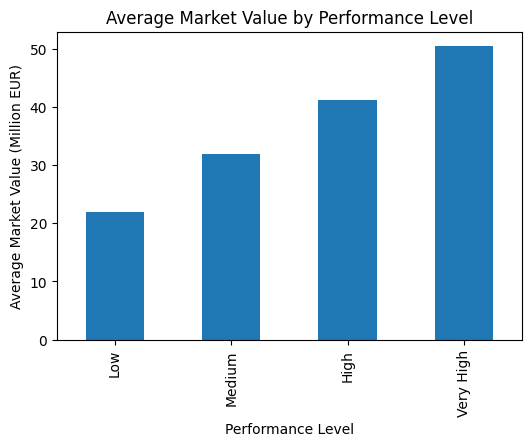

In [35]:
import matplotlib.pyplot as plt


combined_df['Performance_Level'] = pd.qcut(
    combined_df['Points'],
    q=4,
    labels=['Low','Medium','High','Very High']
)

avg_value_perf = combined_df.groupby('Performance_Level', observed=False)['Market value'].mean()

avg_value_perf_millions = avg_value_perf / 1_000_000

plt.figure(figsize=(6,4))
avg_value_perf_millions.plot(kind='bar')
plt.xlabel('Performance Level')
plt.ylabel('Average Market Value (Million EUR)')
plt.title('Average Market Value by Performance Level')
plt.show()

*Answer to research question:* The bar chart displays the average market value across different performance levels. A consistent increase in average market value from low to very high performance groups is observed, indicating a positive relationship between attacking contribution and player valuation in the Premier League.

*Research question:* Is there any relation between the players' age and their market value in the Premier league?

<Figure size 700x400 with 0 Axes>

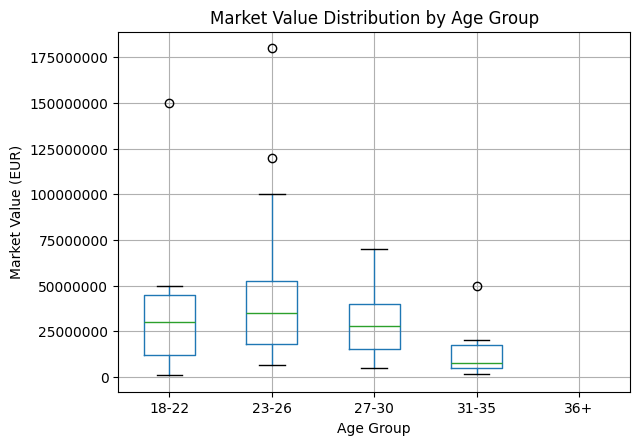

In [36]:
combined_df['Age_Group'] = pd.cut(
    combined_df['Age'],
    bins=[18,22,26,30,35,40],
    labels=['18-22','23-26','27-30','31-35','36+']
)
combined_df['Market_Value_Million'] = combined_df['Market value'] / 1_000_000

plt.figure(figsize=(7,4))
combined_df.boxplot(column='Market value', by='Age_Group')
plt.xlabel('Age Group')
plt.ylabel('Market Value (EUR)')
plt.title('Market Value Distribution by Age Group')
plt.suptitle('')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


*Answer to research question:* The box plot shows the distribution of market values across different age groups. Players aged 23–26 exhibit the highest median market value and the widest range of valuations, indicating peak financial worth during early career stages. Market values decline progressively in older age groups, with players aged 31–35 showing substantially lower valuations. This visualization demonstrates a negative relationship between age and market value after the mid-twenties.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If more time were available, further investigation would be conducted into data quality checks on player identifiers, such as name variations and position classifications, would also be explored to improve dataset merging accuracy. 

Future research could examine differences in valuation trends by specific attacking positions (e.g., strikers versus wingers) or analyze how playing time influences market value alongside performance.